<a href="https://colab.research.google.com/github/Fathi146/Data-Science/blob/main/P146216_STQD6324_Assignment1_Executive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Loading**

Data Source
https://public.tableau.com/app/learn/sample-data

In [1]:
#Importing necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [2]:
#Uploading the files to google colab
from google.colab import files
uploaded = files.upload()

Saving sample_-_superstore.xls to sample_-_superstore.xls


In [4]:
#Load the files into the workspace
data = pd.read_excel('sample_-_superstore.xls')

# **Data Cleaning**

In [5]:
#Checking the data
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [9]:
#Checking the data type
data.dtypes

,0
Row ID,int64
Order ID,object
Order Date,datetime64[ns]
Ship Date,datetime64[ns]
Ship Mode,object
Customer ID,object
Customer Name,object
Segment,object
Country,object
City,object


In [10]:
#Checking the data
data.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


In [11]:
#Changing the date format for further cleaning
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

In [12]:
#Splitting the Month, Year and Day of the date for easier analysis
data['Order Month'] = data['Order Date'].dt.month
data['Order Year'] = data['Order Date'].dt.year
data['Order Day of Week'] = data['Order Date'].dt.dayofweek

In [13]:
#Checking the changes
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Month,Order Year,Order Day of Week
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,11,2016,1
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,11,2016,1
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,6,2016,6
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,10,2015,6
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,10,2015,6


In [14]:
#Applying the date splitting to Ship date
data['Ship Month'] = data['Ship Date'].dt.month
data['Ship Year'] = data['Ship Date'].dt.year
data['Ship Day of Week'] = data['Ship Date'].dt.dayofweek

In [15]:
#Checking the changes
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sales,Quantity,Discount,Profit,Order Month,Order Year,Order Day of Week,Ship Month,Ship Year,Ship Day of Week
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,261.9600,2,0.00,41.9136,11,2016,1,11,2016,4
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,731.9400,3,0.00,219.5820,11,2016,1,11,2016,4
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,14.6200,2,0.00,6.8714,6,2016,6,6,2016,3
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,957.5775,5,0.45,-383.0310,10,2015,6,10,2015,6
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,22.3680,2,0.20,2.5164,10,2015,6,10,2015,6


In [16]:
#Removing day columns as it does not seem necessary
data = data.drop(columns='Order Day of Week')
data = data.drop(columns='Ship Day of Week')

In [17]:
#Checking the changes
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Month,Order Year,Ship Month,Ship Year
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,11,2016,11,2016
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,11,2016,11,2016
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,6,2016,6,2016
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,10,2015,10,2015
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,10,2015,10,2015


In [19]:
#Changing the data type from object to string for easier handling
data['Order ID'] = data['Order ID'].astype('string')
data['Ship Mode'] = data['Ship Mode'].astype('string')
data['Customer ID'] = data['Customer ID'].astype('string')
data['Customer Name'] = data['Customer Name'].astype('string')
data['Segment'] = data['Segment'].astype('string')
data['Country'] = data['Country'].astype('string')
data['City'] = data['City'].astype('string')
data['State'] = data['State'].astype('string')
data['Region'] = data['Region'].astype('string')
data['Product ID'] = data['Product ID'].astype('string')
data['Category'] = data['Category'].astype('string')
data['Sub-Category'] = data['Sub-Category'].astype('string')
data['Product Name'] = data['Product Name'].astype('string')

In [20]:
#Checking data types after changes
data.dtypes

,0
Row ID,int64
Order ID,string[python]
Order Date,datetime64[ns]
Ship Date,datetime64[ns]
Ship Mode,string[python]
Customer ID,string[python]
Customer Name,string[python]
Segment,string[python]
Country,string[python]
City,string[python]


In [22]:
#Checking for missing data
data.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


# Data Analysis

In [23]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Month,Order Year,Ship Month,Ship Year
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,11,2016,11,2016
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,11,2016,11,2016
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,6,2016,6,2016
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,10,2015,10,2015
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,10,2015,10,2015


**Sales & Profit Analysis**

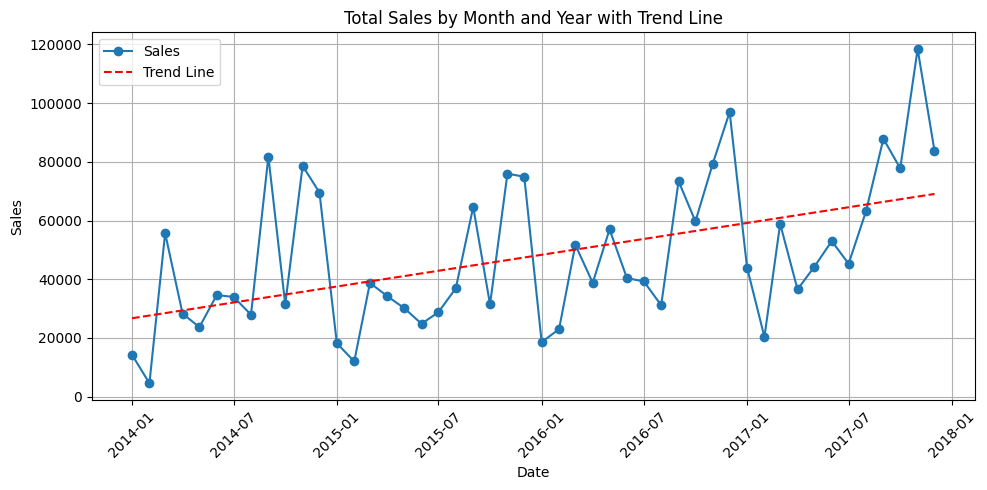

In [46]:
# Group by Year and Month, then Sum Sales
sales_by_month = data.groupby(['Order Year', 'Order Month'])['Sales'].sum().reset_index()

# Create a Date for Plotting
sales_by_month['Date'] = pd.to_datetime(sales_by_month['Order Year'].astype(str) + '-' + sales_by_month['Order Month'].astype(str) + '-01')

# Plot the time graph
plt.figure(figsize=(10, 5))
plt.plot(sales_by_month['Date'], sales_by_month['Sales'], marker='o', label='Sales')

# Calculate and plot the trend line
z = np.polyfit(sales_by_month['Date'].map(pd.Timestamp.toordinal), sales_by_month['Sales'], 1)
p = np.poly1d(z)
plt.plot(sales_by_month['Date'], p(sales_by_month['Date'].map(pd.Timestamp.toordinal)), color='red', linestyle='--', label='Trend Line')

# Customize the plot
plt.title('Total Sales by Month and Year with Trend Line')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

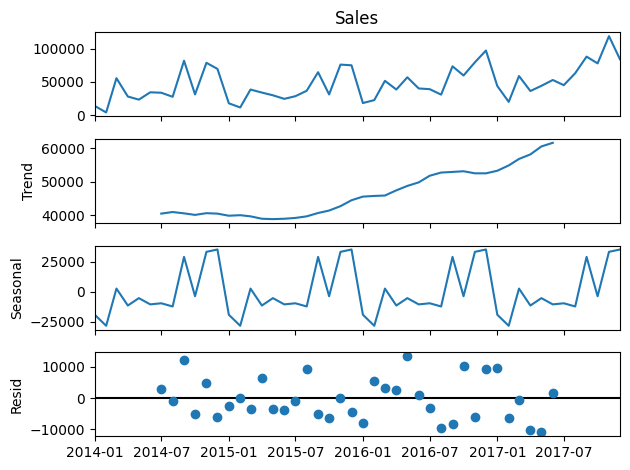

In [31]:
# Load package for decomposing time graph
from statsmodels.tsa.seasonal import seasonal_decompose

# Reformat date to fit the decomposition package
sales_by_month = data.groupby(['Order Year', 'Order Month'])['Sales'].sum().reset_index()
sales_by_month['Date'] = pd.to_datetime(sales_by_month['Order Year'].astype(str) + '-' + sales_by_month['Order Month'].astype(str) + '-01')
sales_by_month.set_index('Date', inplace=True)

# Decompose the time graph
result = seasonal_decompose(sales_by_month['Sales'], model='additive')

# Plot the Decomposed Components
result.plot()
plt.show()

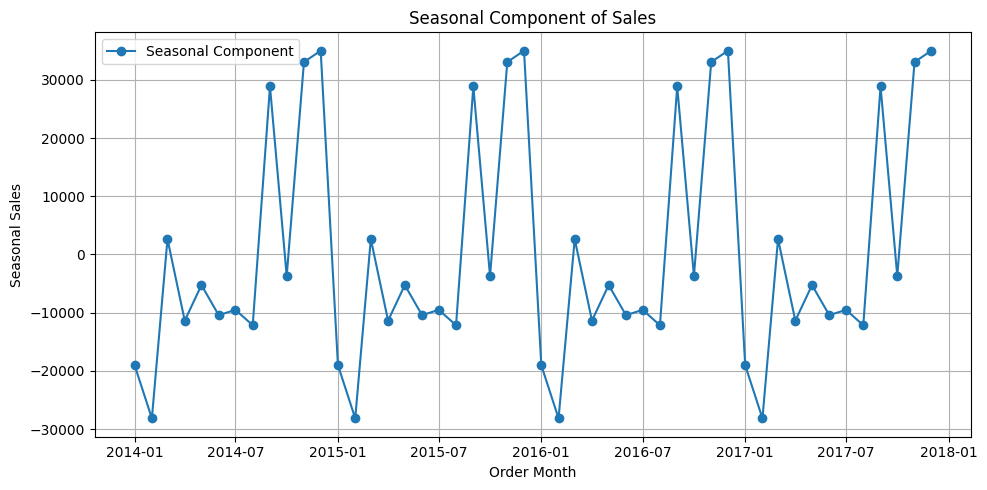

In [38]:
# Plot only the seasonal graph to see in more details
plt.figure(figsize=(10, 5))
plt.plot(result.seasonal, marker='o', label='Seasonal Component')
plt.title('Seasonal Component of Sales')
plt.xlabel('Order Month')
plt.ylabel('Seasonal Sales')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

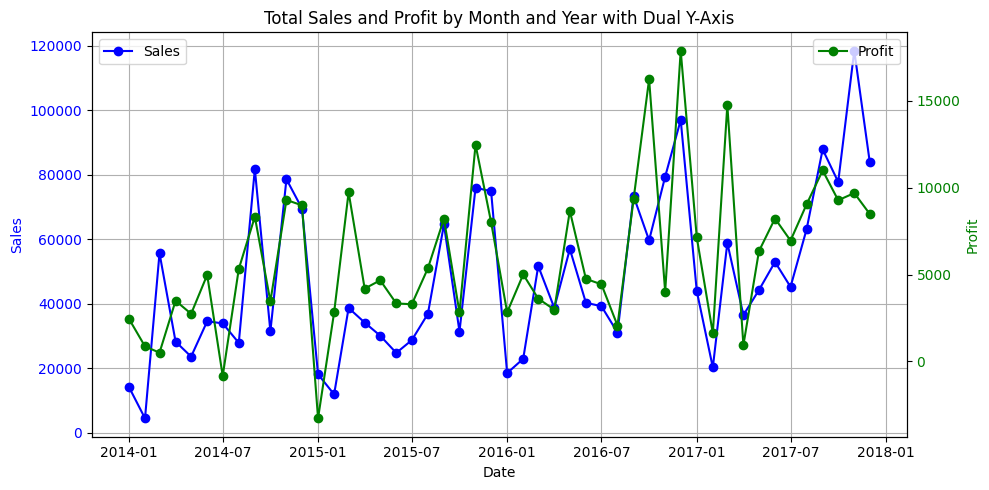

In [45]:
# Group by Year and Month, then Sum Sales and Profit
sales_by_month = data.groupby(['Order Year', 'Order Month']).agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# Create a Date for Plotting
sales_by_month['Date'] = pd.to_datetime(sales_by_month['Order Year'].astype(str) + '-' + sales_by_month['Order Month'].astype(str) + '-01')

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot Sales on primary y-axis
ax1.plot(sales_by_month['Date'], sales_by_month['Sales'], marker='o', label='Sales', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Sales', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis for Profit
ax2 = ax1.twinx()  # Instantiate a second y-axis sharing the same x-axis
ax2.plot(sales_by_month['Date'], sales_by_month['Profit'], marker='o', label='Profit', color='green')
ax2.set_ylabel('Profit', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Customize the plot
plt.title('Total Sales and Profit by Month and Year with Dual Y-Axis')
ax1.grid()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

**Category Analysis**

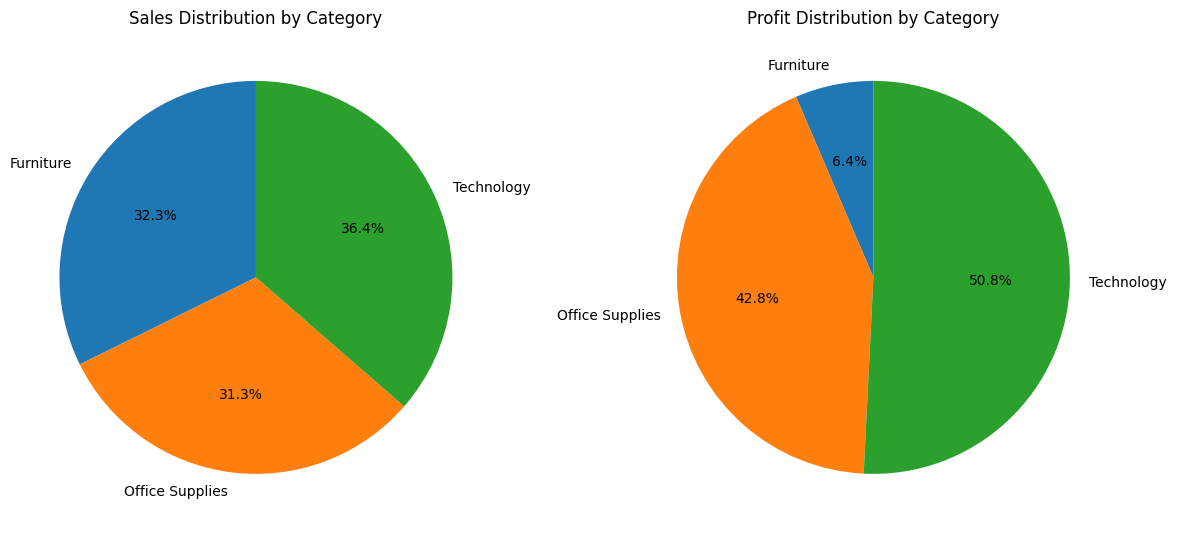

In [48]:
# Group by Category and Sum Sales and Profit
category_summary = df.groupby('Category').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# Create Pie Charts
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot Pie Chart for Sales
axs[0].pie(category_summary['Sales'], labels=category_summary['Category'], autopct='%1.1f%%', startangle=90)
axs[0].set_title('Sales Distribution by Category')

# Plot Pie Chart for Profit
axs[1].pie(category_summary['Profit'], labels=category_summary['Category'], autopct='%1.1f%%', startangle=90)
axs[1].set_title('Profit Distribution by Category')

# Show the plots
plt.tight_layout()
plt.show()

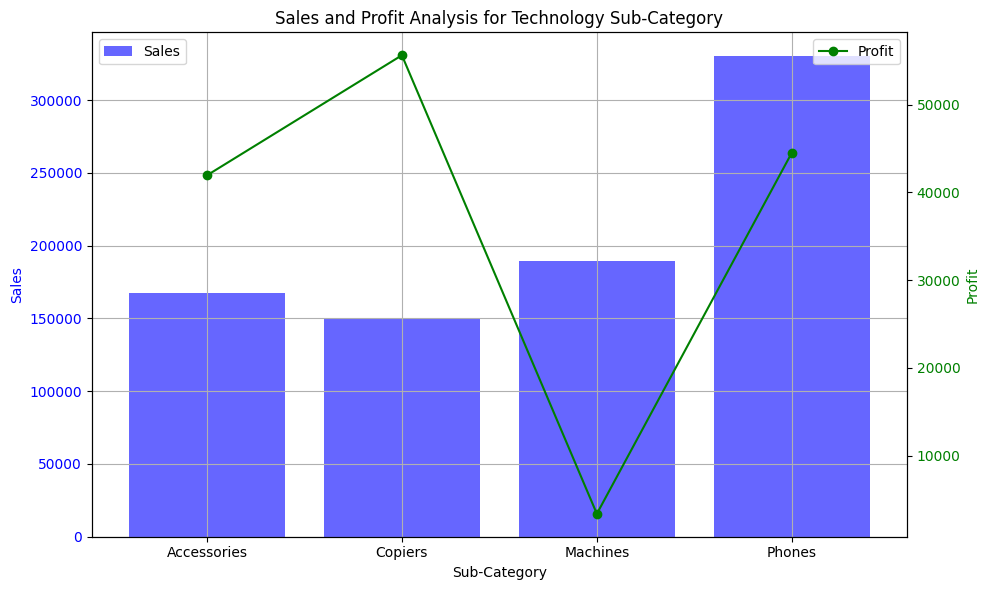

In [50]:
# Filter for Technology Category
tech_data = data[data['Category'] == 'Technology']

# Group by Subcategory and Sum Sales and Profit
tech_summary = tech_data.groupby('Sub-Category').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# Create a Bar Chart for Sales and Profit in Technology
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Sales
ax1.bar(tech_summary['Sub-Category'], tech_summary['Sales'], label='Sales', color='blue', alpha=0.6)
ax1.set_xlabel('Sub-Category')
ax1.set_ylabel('Sales', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis for Profit
ax2 = ax1.twinx()  # Instantiate a second y-axis sharing the same x-axis
ax2.plot(tech_summary['Sub-Category'], tech_summary['Profit'], marker='o', label='Profit', color='green')
ax2.set_ylabel('Profit', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Customize the plot
plt.title('Sales and Profit Analysis for Technology Sub-Category')
ax1.grid()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()